In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv('Dataset/dataset.csv')
df.head()

,X,Y,Z,Mixed,ClassLabel
0,0.125022,0.094986,0.001297,0.157018,1
1,0.150710,0.083282,-0.023514,0.173788,1
2,0.102941,0.111084,0.010075,0.151782,1
3,0.038450,0.049911,0.007511,0.063451,1
4,-0.029148,-0.105423,0.017124,0.110711,1


In [3]:
person1 = df[df['ClassLabel'] == 1]
person2 = df[df['ClassLabel'] == 2]
person3 = df[df['ClassLabel'] == 2]
person4 = df[df['ClassLabel'] == 4]
person5 = df[df['ClassLabel'] == 5]

In [4]:
# Define functions for outlier removal and metric calculation
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [5]:
def calculate_metrics(window):
    mean = window.mean()
    std_dev = window.std()
    energy = np.sum(np.square(window))
    hist = np.histogram(window, bins=10, density=True)[0]
    entropy = -np.sum(hist * np.log2(hist + 1e-10))
    peaks, _ = find_peaks(window, height=0)
    num_peaks = len(peaks)
    return mean, std_dev, energy, entropy, num_peaks

In [6]:
window_size = 100
all_metrics = []
personas = [person1, person2, person3, person4, person5]

In [7]:
window_size = 100
all_metrics = []
personas = [person1, person2, person3, person4, person5]

for index, person_df in enumerate(personas):
    # Remove outliers for each column
    for col in ['X', 'Y', 'Z', 'Mixed']:
        person_df = remove_outliers_iqr(person_df, col)

    # Calculate metrics for each column
    metrics = {}
    for col in ['X', 'Y', 'Z', 'Mixed']:
        for metric_name in ['Mean', 'Std Dev', 'Energy', 'Entropy', 'Peaks']:
            metrics[f'{metric_name}_{col}'] = []

    for i in range(0, len(person_df)):
        for col in ['X', 'Y', 'Z', 'Mixed']:
            window = person_df[col].iloc[i:i + window_size]
            mean, std_dev, energy, entropy, num_peaks = calculate_metrics(window)
            metrics[f'Mean_{col}'].append(mean)
            metrics[f'Std Dev_{col}'].append(std_dev)
            metrics[f'Energy_{col}'].append(energy)
            metrics[f'Entropy_{col}'].append(entropy)
            metrics[f'Peaks_{col}'].append(num_peaks)

    result_df = pd.DataFrame(metrics)
    result_df['category'] = index + 1  # Add category based on index (+1 to start from 1)
    all_metrics.append(result_df)

# Concatenate all DataFrames into one
combined_df = pd.concat(all_metrics)

# Save combined DataFrame to CSV
combined_df.to_csv('combined_metrics.csv', index=False)


In [8]:
combined_df.describe()

,Mean_X,Std Dev_X,Energy_X,Entropy_X,Peaks_X,Mean_Y,Std Dev_Y,Energy_Y,Entropy_Y,Peaks_Y,...,Std Dev_Z,Energy_Z,Entropy_Z,Peaks_Z,Mean_Mixed,Std Dev_Mixed,Energy_Mixed,Entropy_Mixed,Peaks_Mixed,category
count,4388.000000,4383.000000,4388.000000,4388.000000,4388.000000,4388.000000,4383.000000,4388.000000,4388.000000,4388.000000,...,4383.000000,4388.000000,4388.000000,4388.000000,4388.000000,4383.000000,4388.000000,4388.000000,4388.000000,4388.000000
mean,0.004006,0.089387,1.072148,-158.810492,15.977666,0.009437,0.135307,2.314744,-252.328564,19.127165,...,0.067794,0.679518,-364.720366,19.713993,0.160095,0.080044,4.065248,-314.594699,27.043072,2.997949
std,0.024133,0.056847,1.001885,764.138718,4.292311,0.024470,0.076748,2.099678,9279.406230,5.218609,...,0.048074,0.731044,3959.333191,4.816535,0.096438,0.046162,3.680242,7930.806030,5.782330,1.412841
min,-0.191591,0.002174,0.000001,-34694.374782,0.000000,-0.142838,0.000227,0.000059,-434709.340039,0.000000,...,0.000491,0.000013,-184568.553552,0.000000,0.008352,0.000261,0.000073,-371539.304425,0.000000,1.000000
25%,-0.002825,0.024238,0.058274,-300.552498,14.000000,-0.004412,0.051360,0.261709,-102.262692,17.000000,...,0.015005,0.022420,-573.078644,18.000000,0.051069,0.028717,0.341078,-285.032911,27.000000,2.000000
50%,0.000338,0.103842,1.025896,-27.489962,17.000000,0.003829,0.142736,1.926557,-13.497040,20.000000,...,0.076414,0.562029,-51.055387,21.000000,0.179642,0.085308,3.665701,-47.255963,28.000000,3.000000
75%,0.011288,0.139175,1.921716,-14.100193,19.000000,0.019464,0.206085,4.195303,-3.364960,23.000000,...,0.104575,1.147894,-25.644717,23.000000,0.252299,0.124242,7.467996,-20.995007,30.000000,4.000000
max,0.258800,0.238033,3.431192,-6.108219,24.000000,0.257938,0.316833,7.932150,0.710296,30.000000,...,0.161348,2.589418,-8.427518,28.000000,0.358251,0.170074,12.525864,-12.686242,35.000000,5.000000


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4388 entries, 0 to 846
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mean_X         4388 non-null   float64
 1   Std Dev_X      4383 non-null   float64
 2   Energy_X       4388 non-null   float64
 3   Entropy_X      4388 non-null   float64
 4   Peaks_X        4388 non-null   int64  
 5   Mean_Y         4388 non-null   float64
 6   Std Dev_Y      4383 non-null   float64
 7   Energy_Y       4388 non-null   float64
 8   Entropy_Y      4388 non-null   float64
 9   Peaks_Y        4388 non-null   int64  
 10  Mean_Z         4388 non-null   float64
 11  Std Dev_Z      4383 non-null   float64
 12  Energy_Z       4388 non-null   float64
 13  Entropy_Z      4388 non-null   float64
 14  Peaks_Z        4388 non-null   int64  
 15  Mean_Mixed     4388 non-null   float64
 16  Std Dev_Mixed  4383 non-null   float64
 17  Energy_Mixed   4388 non-null   float64
 18  Entropy_Mixed 

In [10]:
combined_df.head()

,Mean_X,Std Dev_X,Energy_X,Entropy_X,Peaks_X,Mean_Y,Std Dev_Y,Energy_Y,Entropy_Y,Peaks_Y,...,Std Dev_Z,Energy_Z,Entropy_Z,Peaks_Z,Mean_Mixed,Std Dev_Mixed,Energy_Mixed,Entropy_Mixed,Peaks_Mixed,category
0,0.025967,0.149649,2.284523,-10.269194,17,0.019115,0.236742,5.585155,-1.251265,20,...,0.114890,1.308246,-17.827970,20,0.268438,0.139471,9.131639,-18.530758,27,1
1,0.024132,0.149547,2.272307,-10.310649,16,0.020332,0.237447,5.623074,-1.204877,20,...,0.116141,1.338520,-17.687143,20,0.269707,0.139023,9.187616,-18.425003,26,1
2,0.021001,0.150147,2.275984,-9.992131,16,0.021384,0.237961,5.651662,-1.171929,20,...,0.116818,1.355477,-17.593953,19,0.270788,0.138690,9.236838,-18.255960,27,1
3,0.019992,0.149930,2.265391,-10.067565,16,0.025724,0.243507,5.936428,-0.909256,20,...,0.117885,1.382936,-17.495941,19,0.274968,0.141341,9.538472,-17.979045,27,1
4,0.019370,0.149982,2.264473,-10.036759,17,0.029207,0.246331,6.092519,-0.772432,21,...,0.118369,1.396498,-17.422948,18,0.278490,0.140402,9.707206,-18.063853,27,1


(array([  10.,  202., 1496.,    0.,    0.,    0.,    0.,    0.,  249.,
         336.,  408.,  120.,  211.,  270.,  353.,  473.,  158.,   78.,
          21.,    3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

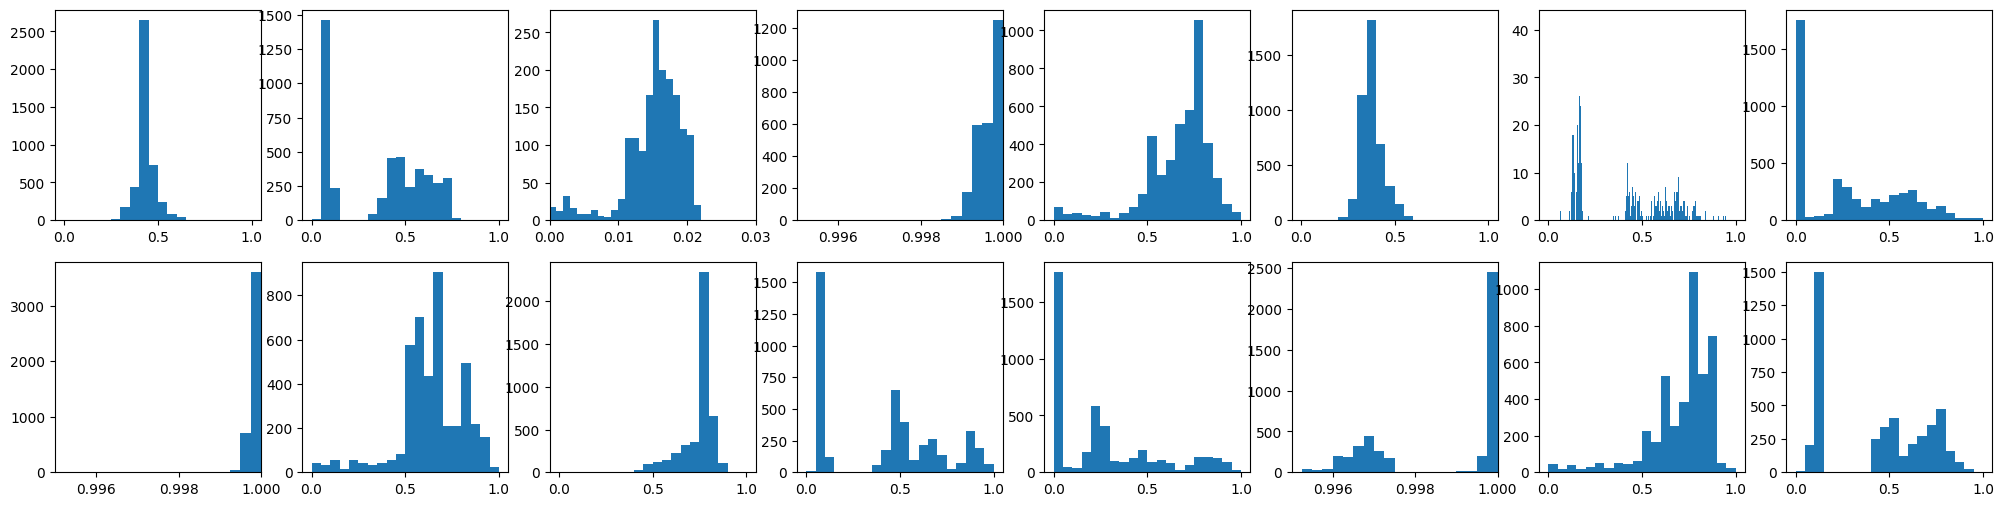

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

fig, axs = plt.subplots(2, 8, figsize=(25, 6))
X = np.array(combined_df)

stdScale = MinMaxScaler(feature_range=(0,1))
X = (stdScale.fit_transform(X))

axs[0][0].hist(X[:,0], bins = 20)

axs[0][1].hist(X[:,1], bins = 20)
axs[0][2].hist(X[:,2], bins = 1000)
axs[0][2].set_xlim(0,0.03)
axs[0][3].hist(X[:,3], bins = 4000)
axs[0][3].set_xlim(0.995,1)
axs[0][4].hist(X[:,4], bins = 20)
axs[0][5].hist(X[:,5], bins = 20)
axs[0][6].hist(X[:,6], bins = 2000)
axs[0][7].hist(X[:,7], bins = 20)
axs[1][0].hist(X[:,8], bins = 4000)
axs[1][0].set_xlim(0.995,1)
axs[1][1].hist(X[:,9], bins = 20)
axs[1][2].hist(X[:,10], bins = 20)
axs[1][3].hist(X[:,11], bins = 20)
axs[1][4].hist(X[:,12], bins = 20)
axs[1][5].hist(X[:,13], bins = 4000)
axs[1][5].set_xlim(0.995,1)
axs[1][6].hist(X[:,14], bins = 20)
axs[1][7].hist(X[:,15], bins = 20)

In [12]:
axs[0][3].hist(X[:,3], bins = 1000)

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0